# Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos.

**PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa al menostres de las transformaciones de datos propuestas:

1- Detección y eliminación de Outliers

2- Encoding

3- Imputación de valores faltantes

4- Escalado de datos

5- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe

In [1]:
#imporamos las librerias con las que vamos a trabajar en la parte A
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proyecto = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') #importamos el dataset 
proyecto.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
proyecto.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [4]:
proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [ ]:

#nprop = proyecto.property_type.isin(['Departamento', 'Casa', 'PH'])
#nsup=(proyecto['surface_total']>=proyecto['surface_covered'])
#nprecio= proyecto['price']<=400000
#ncap= proyecto['l2']=='Capital Federal'
#nban= proyecto['bathrooms']<=5

        
#proyecto=proyecto[nprop & nsup & nprecio & ncap & nban]
#proyecto.shape



En primer lugar, voy a sacar las columnas con las que no voy a trabajar.
Voy a reemplazar datos faltantes de bathrooms por con el valor 1 ya que todas las casas tienen como minimo un baño. Adicionalmente, voy a reemplazar los datos faltantes de Superficie total y cubierta por la media

In [5]:
proyecto ['bathrooms'] = proyecto['bathrooms'].fillna(1)

In [6]:
proyecto [ 'surface_covered'] = proyecto ['surface_covered'].fillna(proyecto['surface_covered'].mean())

In [7]:
proyecto [ 'surface_total'] = proyecto ['surface_total'].fillna(proyecto['surface_total'].mean())

In [8]:
proyecto.isna().sum()

start_date            0
end_date              0
created_on            0
lat                9925
lon                9959
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [9]:
proyecto.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,146660.000000,146660.000000,146660.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.575624,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.879091,1889.638072,846.604724,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,56.000000,50.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,91.000000,77.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,216.872888,112.818011,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Una vez que rellene los datos con los que voy a trabajar, filtro de nuevo el dataset y selecciono los tipos de propiedades, superficies y valores con los que voy a trabajar

In [10]:
nprop= (proyecto ['property_type']== 'Departamento')|(proyecto ['property_type']== 'Casa')|(proyecto ['property_type']== 'PH')
nsup=(proyecto['surface_total']>=proyecto['surface_covered'])
nprecio= proyecto['price']<=400000
ncap= proyecto['l2']=='Capital Federal'
nban= proyecto['bathrooms']<=5

        
proyecto=proyecto[nprop & nsup & nprecio & ncap & nban]
proyecto.shape



(79015, 19)

In [11]:
proyecto_uno = proyecto.drop(columns = ['start_date', 'end_date', 'lat', 'lon', 'currency','title', 'description', 'operation_type', 'l1', 'created_on'])

In [12]:
proyecto_uno

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146542,Capital Federal,Palermo,2.0,1.0,1.0,80.0,80.0,170000.0,Departamento
146543,Capital Federal,Palermo,3.0,2.0,2.0,85.0,81.0,225000.0,Departamento
146545,Capital Federal,Palermo,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento
146549,Capital Federal,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH


In [13]:
proyecto_uno.info

<bound method DataFrame.info of                      l2             l3  rooms  bedrooms  bathrooms  \
0       Capital Federal  San Cristobal    7.0       7.0        2.0   
1       Capital Federal          Boedo    2.0       1.0        2.0   
2       Capital Federal        Palermo    2.0       1.0        1.0   
3       Capital Federal        Palermo    2.0       1.0        1.0   
5       Capital Federal   Villa Crespo    2.0       1.0        1.0   
...                 ...            ...    ...       ...        ...   
146542  Capital Federal        Palermo    2.0       1.0        1.0   
146543  Capital Federal        Palermo    3.0       2.0        2.0   
146545  Capital Federal        Palermo    3.0       2.0        2.0   
146549  Capital Federal        Palermo    3.0       2.0        1.0   
146550  Capital Federal        Palermo    5.0       2.0        2.0   

        surface_total  surface_covered     price property_type  
0               140.0            140.0  153000.0  Departamento

Realizamos una serie de graficos para ver y analizar los outliers

Text(0.5, 1.0, 'Distribución de la variable Price:')

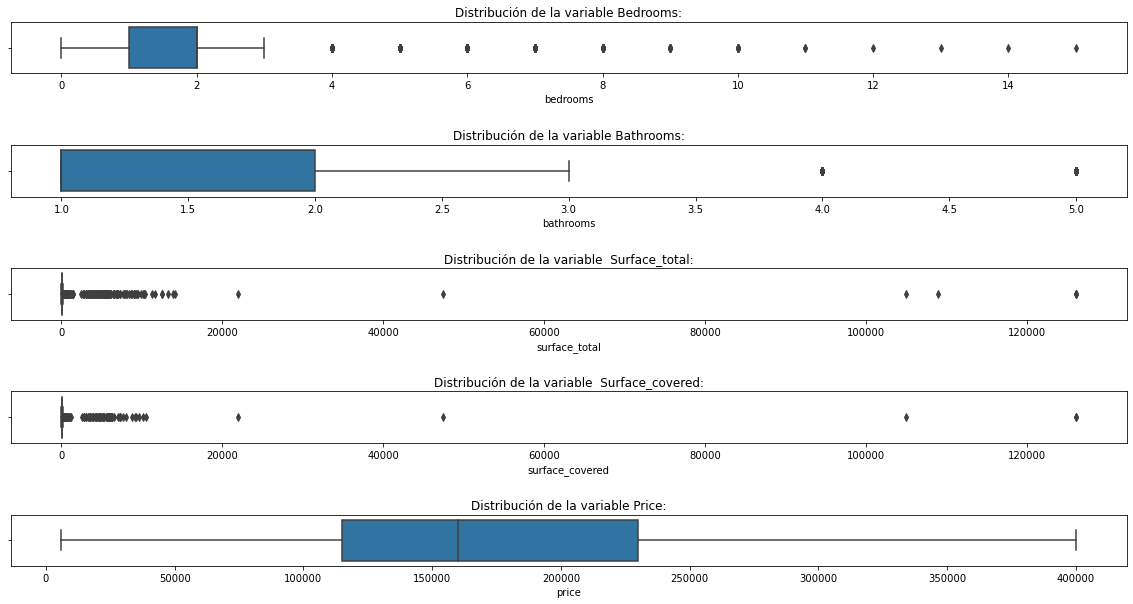

In [14]:
plt.figure(figsize =(20,10))

plt.subplot(9,1,1)

sns.boxplot(data= proyecto_uno, x='bedrooms')
plt.title('Distribución de la variable Bedrooms:')

plt.subplot(9,1,3)

sns.boxplot(data= proyecto_uno, x='bathrooms')
plt.title('Distribución de la variable Bathrooms:')

plt.subplot(9,1,5)

sns.boxplot(data= proyecto_uno, x='surface_total')
plt.title('Distribución de la variable  Surface_total:')

plt.subplot(9,1,7)

sns.boxplot(data= proyecto_uno, x='surface_covered')
plt.title('Distribución de la variable  Surface_covered:')

plt.subplot(9,1,9)

sns.boxplot(data= proyecto_uno, x='price')
plt.title('Distribución de la variable Price:')

Para quitar los outliers, voy a utilizar la regla de tres sigmas (en el proyecto anterior utilice rango intercuartilico)

In [20]:
from scipy.stats import zscore

zscore_precio = zscore(proyecto_uno['price'])
zscore_suptot = zscore(proyecto_uno['surface_total'])
zscore_supcub = zscore(proyecto_uno['surface_covered'])
filtro_zscore = (abs(zscore_precio)>3) |  (abs(zscore_suptot)>3) | (abs(zscore_supcub)>3)
proyecto_dos= proyecto_uno[~filtro_zscore]

In [21]:
proyecto_dos.shape

(78899, 9)

Volvemos a graficar para ver la nueva distribución

Text(0.5, 1.0, 'Distribución de la variable Price:')

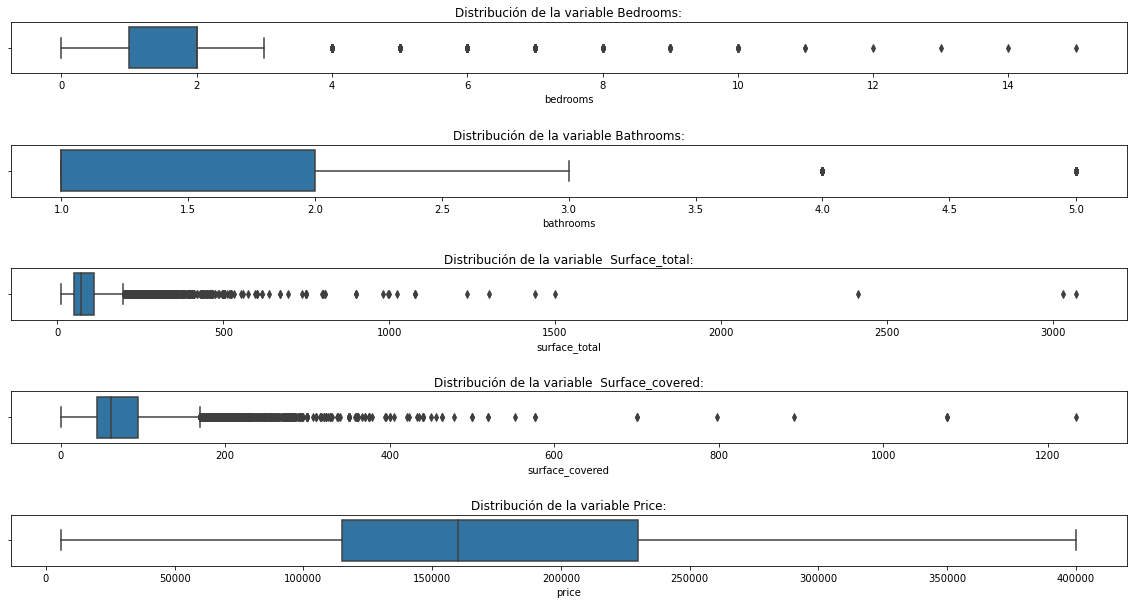

In [24]:
plt.figure(figsize =(20,10))

plt.subplot(9,1,1)

sns.boxplot(data= proyecto_dos, x='bedrooms')
plt.title('Distribución de la variable Bedrooms:')

plt.subplot(9,1,3)

sns.boxplot(data= proyecto_dos, x='bathrooms')
plt.title('Distribución de la variable Bathrooms:')

plt.subplot(9,1,5)

sns.boxplot(data= proyecto_dos, x='surface_total')
plt.title('Distribución de la variable  Surface_total:')

plt.subplot(9,1,7)

sns.boxplot(data= proyecto_dos, x='surface_covered')
plt.title('Distribución de la variable  Surface_covered:')

plt.subplot(9,1,9)

sns.boxplot(data= proyecto_dos, x='price')
plt.title('Distribución de la variable Price:')

In [25]:
proyecto_dos

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146542,Capital Federal,Palermo,2.0,1.0,1.0,80.0,80.0,170000.0,Departamento
146543,Capital Federal,Palermo,3.0,2.0,2.0,85.0,81.0,225000.0,Departamento
146545,Capital Federal,Palermo,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento
146549,Capital Federal,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH


Definimos X e y y estandarizamos los datos

In [26]:
X = proyecto_dos[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']] 
y = proyecto_dos['price']

In [27]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler #escale solo sobre X porque si primero hacia train/test estaba particionando los datos e iba a trabajar solo con la muestra

scl = StandardScaler()
X_train_scaler = scl.fit_transform(X)
X_train_scaler

array([[ 3.76030969,  5.37581759,  1.04094357,  0.70600256,  1.78985476],
       [-0.66292121, -0.8244616 ,  1.04094357, -0.33414235, -0.35480058],
       [-0.66292121, -0.8244616 , -0.58948159, -0.70562268, -0.69480691],
       ...,
       [ 0.22172497,  0.20891827,  1.04094357, -0.06667652,  0.27290342],
       [ 0.22172497,  0.20891827, -0.58948159, -0.12611337,  0.32521209],
       [ 1.99101733,  0.20891827,  1.04094357,  0.31966302,  0.61290976]])

In [29]:
np.mean(X_train_scaler),np.std(X_train_scaler) #media y desviacion estandar

(-1.2910608068361824e-16, 0.9999999999999998)

In [30]:
X_train_scaler.shape

(78899, 5)

In [31]:
conca= pd.DataFrame(X_train_scaler, columns = ['rooms1', 'bedrooms1', 'bathrooms1', 'surface_total1', 'surface_covered1'])
concatenado =pd.concat([proyecto_dos,conca], axis=1)
concatenado


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,rooms1,bedrooms1,bathrooms1,surface_total1,surface_covered1
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,3.760310,5.375818,1.040944,0.706003,1.789855
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,-0.662921,-0.824462,1.040944,-0.334142,-0.354801
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,-0.662921,-0.824462,-0.589482,-0.705623,-0.694807
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,-0.662921,-0.824462,-0.589482,-0.111254,-0.564035
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.662921,-0.824462,-0.589482,-0.542171,-0.407109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146542,Capital Federal,Palermo,2.0,1.0,1.0,80.0,80.0,170000.0,Departamento,NaN,NaN,NaN,NaN,NaN
146543,Capital Federal,Palermo,3.0,2.0,2.0,85.0,81.0,225000.0,Departamento,NaN,NaN,NaN,NaN,NaN
146545,Capital Federal,Palermo,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento,NaN,NaN,NaN,NaN,NaN
146549,Capital Federal,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH,NaN,NaN,NaN,NaN,NaN


In [32]:
concatenado.isna().sum()

l2                  34792
l3                  34792
rooms               34792
bedrooms            34792
bathrooms           34792
surface_total       34792
surface_covered     34792
price               34792
property_type       34792
rooms1              34792
bedrooms1           34792
bathrooms1          34792
surface_total1      34792
surface_covered1    34792
dtype: int64

In [42]:
concatenado = concatenado.dropna()
concatenado.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,rooms1,bedrooms1,bathrooms1,surface_total1,surface_covered1
count,44107.000000,44107.000000,44107.000000,44107.000000,44107.000000,44107.000000,44107.000000,44107.000000,44107.000000,44107.000000,44107.000000
mean,2.753781,1.805428,1.349264,87.902498,70.122099,179704.871925,-0.002029,-0.005972,-0.003139,0.000526,-0.005791
std,1.119772,0.961629,0.603399,64.843512,38.119393,82258.558971,0.987375,0.982857,0.999148,1.001010,1.001258
min,1.000000,0.000000,1.000000,13.000000,1.000000,6000.000000,-1.547567,-1.857841,-0.589482,-1.195977,-1.845598
25%,2.000000,1.000000,1.000000,48.000000,43.000000,115000.000000,-0.662921,-0.824462,-0.589482,-0.646186,-0.720961
50%,3.000000,2.000000,1.000000,68.000000,60.000000,160000.000000,0.221725,0.208918,-0.589482,-0.334142,-0.276338
75%,3.000000,2.000000,2.000000,102.000000,89.000000,230000.000000,0.221725,0.208918,1.040944,0.245367,0.560601
max,21.000000,15.000000,5.000000,3070.000000,1077.000000,400000.000000,16.145356,12.609477,5.932219,44.243497,30.402695


# Entrenando Arboles

Entrenamos nuevamente el Arbol de decision con los datos sin escalar y lo vamos a comparar el entrenamiento sobre los datos escalados


voy a usar el mejor modelo del proyecto 

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
X = concatenado[['rooms1', 'bedrooms1', 'bathrooms1', 'surface_total1', 'surface_covered1']]
y = concatenado['price']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Árbol de decision con datos escalados

In [37]:
X_train_dt = X_train
X_test_dt = X_test
y_train_dt =y_train
y_test_dt =y_test

tree = DecisionTreeRegressor(max_depth =3) #La profundidad del árbol es 3
tree.fit (X_train_dt,y_train_dt)

y_train_dt_pred = tree.predict(X_train_dt)
y_test_dt_pred =tree.predict(X_test_dt)

rmse_train_dt =np.sqrt(mean_squared_error(y_train_dt, y_train_dt_pred))
rmse_test_dt =np.sqrt(mean_squared_error(y_test_dt, y_test_dt_pred))
print(f'La raíz de error medio cuadrático en Train es:{rmse_train_dt} ')
print(f'La raíz de error medio cuadrático en Test es:{rmse_test_dt} ')

La raíz de error medio cuadrático en Train es:82226.3776744599 
La raíz de error medio cuadrático en Test es:81377.59014239408 


Arbol sin datos escalados

In [61]:
X_ns = concatenado[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']] 
y_ns = concatenado['price']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ns, y_ns, test_size=0.2, random_state=1)

In [63]:
X_train_ns = X_train
X_test_ns = X_test
y_train_ns =y_train
y_test_ns =y_test

tree = DecisionTreeRegressor(max_depth =3) #La profundidad del árbol es 3
tree.fit (X_train_ns,y_train_ns)

y_train_ns_pred = tree.predict(X_train_ns)
y_test_ns_pred =tree.predict(X_test_ns)

rmse_train_ns =np.sqrt(mean_squared_error(y_train_ns, y_train_ns_pred))
rmse_test_ns =np.sqrt(mean_squared_error(y_test_ns, y_test_ns_pred))
print(f'La raíz de error medio cuadrático en Train es:{rmse_train_ns} ')
print(f'La raíz de error medio cuadrático en Test es:{rmse_test_ns} ')

La raíz de error medio cuadrático en Train es:53716.44068949476 
La raíz de error medio cuadrático en Test es:53115.19523879674 


hacer el sin escalado con los mejores parametros del  y decir cual corre mejor. 

In [64]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
#from sklearn.linear_model import LinearRegression  



In [66]:
#X_train_rl = X_train
#X_test_rl = X_test
#y_train_rl =y_train
#y_test_rl =y_test

#regressor=LinearRegression()  
#regressor.fit(X_train_rl,y_train_rl)  

#y_train_rl_pred = tree.predict(X_train_rl)
#y_test_rl_pred =tree.predict(X_test_rl)

#rmse_train_rl =np.sqrt(mean_squared_error(y_train_rl, y_train_rl_pred))
#rmse_test_rl =np.sqrt(mean_squared_error(y_test_rl, y_test_rl_pred))
#print(f'La raíz de error medio cuadrático en Train es:{rmse_train_rl} ')
#print(f'La raíz de error medio cuadrático en Test es:{rmse_test_rl} ')

In [67]:
#X_train_rl.shape

In [68]:
#from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


In [69]:
#from sklearn.preprocessing import StandardScaler

#scl = StandardScaler()
#X_train_scaler = scl.fit_transform(X_train)
#X_train_scaler

In [70]:
#np.mean(X_train_scaler),np.std(X_train_scaler) #media y desviacion estandar

In [71]:
#X_train_scaler.shape

In [72]:
#X_test_scaler =scl.transform(X_test)
#X_test_scaler

In [73]:
#X_test_scaler.shape

In [74]:
#X_train_dt = X_train_scaler
#X_test_dt = X_test_scaler
#y_train_dt =y_train
#y_test_dt =y_test

#tree = DecisionTreeRegressor(max_depth =3) #La profundidad del árbol es 3
#tree.fit (X_train_dt,y_train_dt)

#y_train_dt_pred = tree.predict(X_train_dt)
#y_test_dt_pred =tree.predict(X_test_dt)

#rmse_train_dt =np.sqrt(mean_squared_error(y_train_dt, y_train_dt_pred))
#rmse_test_dt =np.sqrt(mean_squared_error(y_test_dt, y_test_dt_pred))
#print(f'La raíz de error medio cuadrático en Train es:{rmse_train_dt} ')
#print(f'La raíz de error medio cuadrático en Test es:{rmse_test_dt} ')

In [75]:
#plt.figure(figsize = (15,6))
#plt.subplot(1,2,1)
#sns.distplot(y_train_dt - y_train_dt_pred, bins = 20, label = 'train')
#sns.distplot(y_test_dt - y_test_dt_pred, bins = 20, label = 'test')
#plt.xlabel('errores')
#plt.legend()



#ax = plt.subplot(1,2,2)
#plt.scatter(y_test_dt,y_test_dt_pred, s =2)    
#lims = [
#np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
#    ]    
#ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
#plt.xlabel('y (test)')
#plt.ylabel('y_pred (test)')
    
#plt.tight_layout()
#plt.show()

In [76]:
#X_train_dt.shape

In [77]:
#X_train_ns.shape

comparando el resultado del modelo con los datos escalados al del proyecto , podemos ver que con las nuevas decisiones tomadas el mismo funciona mejor, no tiende tanto al overfitting. 
Aunque el numero de arboles optimo sigue siendo el 11, el modelo funciona mucho mejor. 

**PARTE B - Modelos Avanzados**

6- Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

7- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

8- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

Vamos a utilizar validacion cruzada

Redefinimos nuevamente las variables


In [78]:
X = concatenado[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']] 
y = concatenado['price']

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [88]:
tree = DecisionTreeRegressor()
tree_scores = cross_val_score(tree, X, y, cv=5)

knn = KNeighborsRegressor(n_neighbors=1)
knn_scores = cross_val_score(knn, X, y, cv=5)

In [89]:
print(tree_scores, knn_scores)
# print(tree_scores.mean(), knn_scores.mean())
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

[0.62745851 0.656275   0.63846223 0.63127719 0.6256073 ] [0.46845804 0.51346253 0.51703958 0.44407105 0.49519228]
Accuracy para Tree: 0.64 (+/- 0.02)
Accuracy para KNN: 0.49 (+/- 0.06)


In [90]:
tree_scores = cross_validate(tree, X, y, cv=5)
knn_scores = cross_validate(knn, X, y, cv=5)

In [91]:
print(tree_scores)
print(knn_scores)

{'fit_time': array([0.08927035, 0.05983973, 0.07633042, 0.04587746, 0.04986429]), 'score_time': array([0.00498748, 0.00498605, 0.00299168, 0.00398993, 0.0039897 ]), 'test_score': array([0.62596017, 0.65227483, 0.63619465, 0.63056187, 0.62894366])}
{'fit_time': array([0.07679558, 0.07014847, 0.06640196, 0.06775784, 0.0847249 ]), 'score_time': array([0.05585146, 0.05086422, 0.04492545, 0.05885196, 0.05385613]), 'test_score': array([0.46845804, 0.51346253, 0.51703958, 0.44407105, 0.49519228])}


In [92]:
#La siguiente celda muestra las metricas que podemos usar para evaluar en cross validate


import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

## Curvas de validación

In [94]:
#def entrena_modelo(X_train, X_test, y_train, y_test, modelo):
 #   
    #Entrenamos el modelo y predecimos y_train e y_test:
   #modelo.fit(X_train, y_train)
    #y_train_pred = modelo.predict(X_train)
    #y_test_pred = modelo.predict(X_test)
    
    #Imprimimos las metricas consideradas para evaluar el modelo:
    #rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    #rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #r2 = modelo.score(X_test, y_test)
    #print(f'Score de modelo: {r2}')
    #print(f'Raiz del error cuadrático medio en Train: {rmse_train}')
    #print(f'Raiz del error cuadrático medio en Test: {rmse_test}')
    
    #Graficamos la distribucion de errores:
    #plt.figure(figsize = (15,6))
    #plt.subplot(1,2,1)
    #sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    #sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    #plt.xlabel('errores')
    #plt.legend()
    
    #ax = plt.subplot(1,2,2)
    #plt.scatter(y_test,y_test_pred, s =2)    
    #lims = [
    #np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    #np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    #]    
    #ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    #plt.xlabel('y (test)')
    #plt.ylabel('y_pred (test)')
    
    #plt.tight_layout()
    #plt.show()
    

    #return rmse_train,rmse_test,r2



In [95]:
#X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#modelo4 = RandomForestRegressor()

In [43]:
#rmse_train_4,rmse_test_4,score4 = entrena_modelo(X_train4, X_test4, y_train4, y_test4, modelo4)

In [44]:
#modelo4